# SciPy Optimize Brute

The brute method, though the computationally intensive, is one of the most surefire ways to reach the global minimum.  It computes the function at all the points on a grid.  

Choosing a coarser grid lessens the computational load, but then the algorithm could miss a minimum if the grid is too coarse.  Like all numerical methods, this is a balancing act based on knowledge of the function.

In [47]:
# Importing the packages for the example
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

Defining functions for the tutorial:

In [2]:
f = lambda x : 1/50*(x[0]**2 + x[1]**2) - np.cos(x[0])*np.cos(x[1])

f_parameter = lambda x, a : 1/50*(x[0]**2 + x[1]**2) - np.cos(x[0]-a)*np.cos(x[1])

Now that we've defined these functions, what do they look like?

No handles with labels found to put in legend.


Text(0, 0.5, 'x[1]')

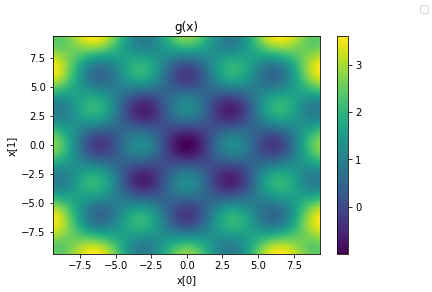

In [3]:
# arrays for the independent variables
x0 = np.arange(-3*np.pi,3*np.pi,.05)
x1 = np.arange(-3*np.pi,3*np.pi,.05)

# creating 2d arrays for the independent variables
x0_a, x1_a = np.meshgrid(x0,x1)

# plotting our test functions
fig, ax = plt.subplots()
pos = ax.pcolormesh(x0_a,x1_a,f([x0_a,x1_a]) )

# labeling and measuring necessities
fig.legend()
fig.colorbar(pos,ax=ax)
ax.set_title('g(x)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')

## Simple function Calls

`brute` takes in the function and a tuple controlling the grid.  The elements of the tuple could be only the bounds:

In [4]:
low = -3*np.pi
high = 3*np.pi
range_version1 = ( (low,high),(low,high) )

optimize.brute(f,range_version1)

array([-3.47966704e-05, -1.01342268e-05])

If you specify a range of `low,high`, then brute will form a grid of `Ns=20` points between the boundaries. You can manually control that number through the `Ns` flag:

In [5]:
Ns=30
optimize.brute(f,range_version1,Ns=Ns)

array([-1.85391370e-05, -6.78182121e-06])

Instead of giving just the boundaries and number of points, you can pass in `slice` objects of low, high, and step:

In [6]:
low = -6*np.pi
high = 6*np.pi
step = 0.5

range_version2 = ( slice(low,high,step),slice(low,high,step) )

optimize.brute(f, range_version2 )

array([ 4.17652142e-05, -2.81951181e-05])



If the function has parameters, they can be passed via `args` in a tuple.

In [7]:
optimize.brute(f_parameter,range_version2, args=(2,))

array([1.92304378e+00, 2.21886886e-05])

## Full Output

The boolean flag `full_output` returns the values computed during the brute computation.  Instead of a single value, the output becomes a tuple containing

| Position | Content | 
| --- | --- | 
| 0 | Minimum position | 
| 1 | Function value at minimum position | 
| 2 | The gridpoints in `np.mgrid` form |
| 3 | Function value at grid points |

In [43]:
ans_full_output = optimize.brute(f,range_version1,full_output=True)

Using that information, we can pull output those values and create a plot:

In [48]:
x0_brute = (ans_full_output[2])[0,:,:]
x1_brute = (ans_full_output[2])[1,:,:]

f_brute = ans_full_output[3]

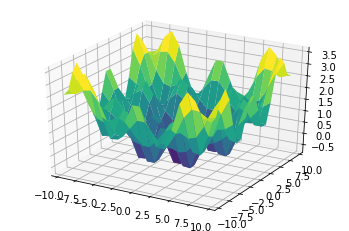

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x0_brute,x1_brute,f_brute,cmap='viridis')

## Finishing Polish 

Brute by itself will only return the lowest point on the fixed grid, but for the sake of computationally efficiency, the grid can be fairly coarse.

In [52]:
optimize.brute(f,range_version1,finish=optimize.minimize )

array([-6.20899835e-09, -6.20899835e-09])

workers ?   don't really understand that part